# Анализ игровой индустрии

Интернет-магазин "Стримчик" продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

# Цель исследования


 Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Проверить 2 гепотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные



   **Ход исследования**:
 
Данные о поведении пользователей я получу из предоставленных файлов. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Я проверю данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных. Далее нужно будет обработать и добавить необходимые значения в таблицу и проанализировать.

 Таким образом, моё исследование пройдёт в шесть этапов:

1. Обзор данных.
2. Предобработка данных.
3. Расчеты необходимых данных и добавления их в общую таблицу.
4. Проведение исследовательского анализа предоставленных данных.
5. Составление среднепользовательского портрета для основных регионов.
6. Проверка гипотез.
7. Написание общего вывода.

## Изучение данных из файла

Импортируем необходимые библиотеки и достаём файлы

In [1]:
import pandas as pd
import matplotlib # импорт библиотек для работы с графиками
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import scipy.stats # библиотека для проверки гипотез
from scipy import stats as st # Статистические распределения и функции
import math

In [2]:
df = pd.read_csv('/datasets/games.csv')

Ознакомимся с данными

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В предоставленной таблице 16715 строк. 11 колонок. 2 типа данных `object`,`float64`

- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `Genre` - жанр игры
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` - продажи в Европе (миллионы проданных копий)
- `JP_sales` -  продажи в Японии (миллионы проданных копий)
- `Other_sales` - продажи в других странах (миллионы проданных копий)
- `Critic_Score` - оценка критиков (максимум 100)
- `User_Score` - оценка пользователей (максимум 10)
- `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Значения некоторых столбцов нужно привести к другому типу данных

Так же имеются пропуски

## Предобработка данных

### Стиль заголовков столбцов

Выведем на экран названия столбцов:

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведите названия в соответствие с хорошим стилем:

In [6]:
df.columns = df.columns.str.lower()

Проверим результат

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Выведем на экран значения, которые показывают % пропусков в каждом столбце DataFrame

In [9]:
pd.DataFrame(round(df.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
name,0.01
platform,0
year_of_release,1.61
genre,0.01
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.32
user_score,40.09


Наблюдаем большую долю пропусков в столбцах: `critic_score`, `user_score`, `rating`. Вероятнее всего, что природа этих пропусков - реальное отсутствие единых данных по оценкам пользователей и критиков, так же ESRB не оценивали эти игры.

Незначительную долю (>5%) наблюдаем в столбцах `year_of_release`, `name`, `genre`. В этих солбцах удалим пропуски. Вероятнее всего, эти пропуски случились в ходе выгрузки таблицы.

Удалим пропуска в столбцах (которые имеют малый % пропусков) с сохранением индекса

In [10]:
df = (df.dropna(subset=['name'])).reset_index(drop=True)
df = (df.dropna(subset=['year_of_release'])).reset_index(drop=True)
df = (df.dropna(subset=['genre'])).reset_index(drop=True)

Остальные столбцы имеют пропуски в очень больших кол-вах, поэтому заполнил заглушками

Перейдем к оценкам критиков. Пропусков в них довольно много, поэтому мы не можем просто удалить их. Заполнять их чем-то тоже не стоит - это может привести к искажениям при дальнейшем анализе. Поэтому заполним пропуски значением -1.


In [11]:
df['critic_score'] = df['critic_score'].fillna('-1')

Проверим уникальные значения в `user_score`

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Наблюдаем переменную `tbd`, обозначающую, что игра еще не вышла. Иными словами, это означает отсутствие оценки. Посколько у нас уже есть значения для отсутствия оценки - маркер -1, то заменим `tbd` на -1, т.к. это дефакто 

In [13]:
df['user_score'] = df['user_score'].replace('tbd', -1)

Остальные пропуски заменим на -1

In [14]:
df['user_score'] = df['user_score'].fillna(-1)

Проверим уникальные значения столбца `rating`

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Обработаем столбец rating. Для начала заменим все значения 'K-A' на Е, т.к. это одно и то же

In [16]:
df['rating'] = df['rating'].replace('K-A', 'E')

Пропуски в рейтинге стоит пометить значением-заглушкой `'unknown'`, Это нам пригодится при составлении портрета пользователя

In [17]:
df['rating'] = df['rating'].fillna('Unknown')

In [18]:
df['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### Замена типа данных и проверка дубликатов

Еще раз проверим какие типы данных в таблице:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null object
user_score         16444 non-null object
rating             16444 non-null object
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


`year_of_release` - год релиза нужно перевести в целочисленный формат

`critic_score` и `user_score` - оценки переведем в дробный формат данных

In [20]:
df['user_score'] = df['user_score'].astype('float64')

In [21]:
df['critic_score'] = df['critic_score'].astype('float64')

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int')

Проверим на наличие дубликатов

In [23]:
df.duplicated().sum()

0

Дубликаты отсутствуют

### Суммарные продажи во всех регионах/

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [25]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Проверим

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


Вывод: 


Провели предобработку и подготовили наши данные к дальнейшему исследованию.

А именно:

- Привели к нижнему регистру названия всех столбцов
- Удалили пропуски в столбах, где их доля несущественна и заполнили заглушками данные там, где доля пропусков велика дабы не искажать данные в дальнейшем
- Заменили типы данных в таких столбцах, как: `user_score` и `critic_score` c `object` на `float`(`object` выполняет строковую конкатенацию т.е складывает строки, а не математические сложения) и в `year_of_release` c `float` на `int` для корректного отображения даты без плавающей точки
- Посчитали суммарные продажи во всех регионах и записали их в новый столбец `total_sales`.



##  Исследовательский анализ данных

### Количество игр выпускаемых в разные года

Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

In [27]:
games_sales = df.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns={'name':'Кол-во проданных игр (млн.)'}, level=0)
games_sales.index = games_sales.index.rename('год')
games_sales

,Кол-во проданных игр (млн.)
год,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим гистограмму, для удобства визуализации

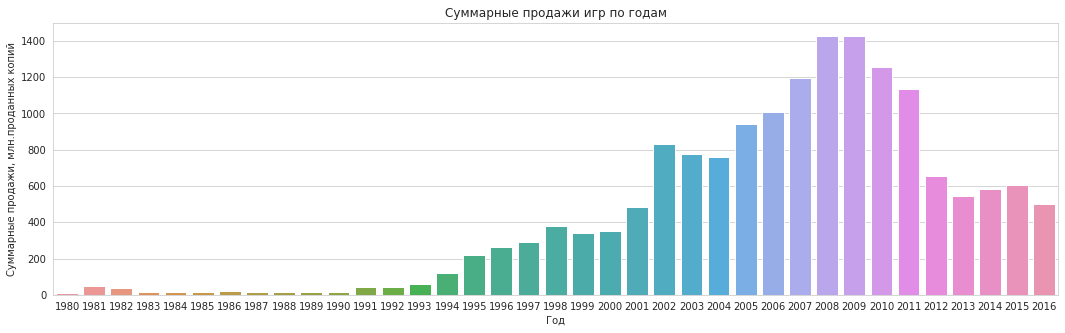

In [28]:
games_sales = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = df, x='year_of_release');
plt.title('Суммарные продажи игр по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Год');


Наблюдаем, что до 1994 года, кол-во проданных игр - минимально. После 1994г цифровые игры становятся все более популярнее. Пик наблюдаем в 2009-2010годах, возможно из за роста мобильных версий игр. 

Отбросим данные до 1994г, т.к. гистограмма до 1994 практически сливается в нулём

In [29]:
df = df.query('year_of_release >= 1994')

Проверим:

In [30]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
Name: year_of_release, dtype: int64

### Как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

Сгруппируем платформы и продажи по ним

In [31]:
platforms_sales = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
platforms_sales = platforms_sales.rename(columns={'total_sales':'Суммарные продажи'}, level=0)
platforms_sales.index = platforms_sales.index.rename('Платформа')
platforms_sales

,Суммарные продажи
Платформа,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [32]:
# создадим список лучших платформ
platform_best = platforms_sales.head(6).index.to_list()
platform_best

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [33]:
# сделаем сводную таблицу с лучшими платфорами
platform_best_table=df.query('platform.isin(@platform_best)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='total_sales', 
                                                                            aggfunc='sum')
platform_best_table

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


Построим график, для лучшей визуализации

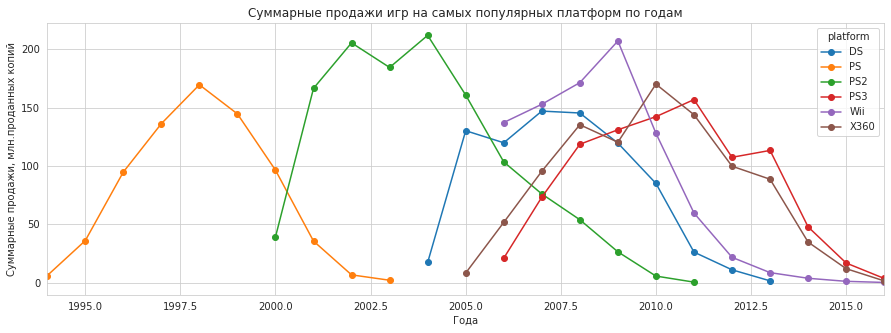

In [34]:
platform_best_table.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1994, 2016)
plt.title('Суммарные продажи игр на самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

Проанализируем, "жизненный путь" каждой платформы:

- PS с 1994 по 2002г (6 лет)
- PS2 С 2000 ПО 2011г (11 лет)
- DS с 2003 по 2013г (10 лет)
- X360 С 2005 по 2016 (11 лет)
- Wii с 2006 по 2016 (10 лет)
- PS3 с 2006 по 2016(10 лет)

В среднем консоли жувут 10-11 лет. Причиной тому является увеличение рекомендуемых требований для игр (Игры становятся более красочнее и лучше, соотвественно нужно более сильное железо)

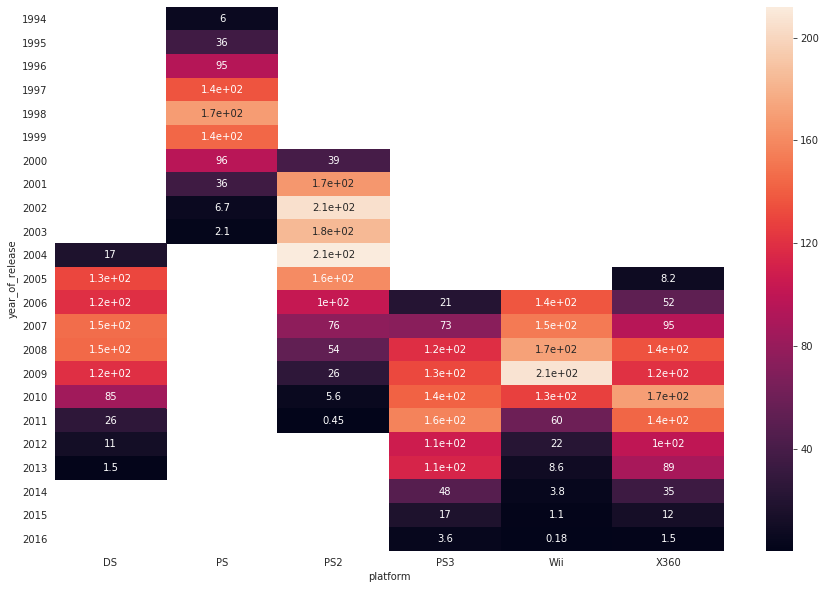

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(platform_best_table, annot = True)
plt.show()

### Выбор актуального периода

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

**Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды.

Т.к. по условиям ТЗ 2016 год является не полным, возьмем данные с 2013 (включительно)

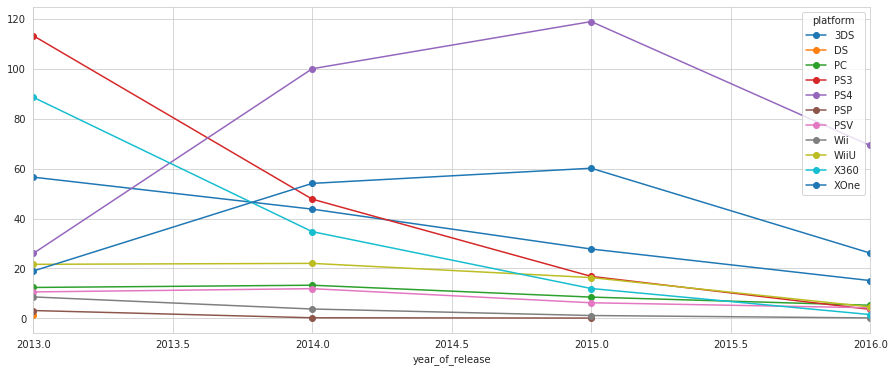

In [36]:
current_period = df.query('2013<=year_of_release')
current_period.pivot_table(index = 'year_of_release',
               values = 'total_sales',
               columns = 'platform',
               aggfunc='sum'
              ).plot(grid=True, figsize=(15, 6), style ='o-');

Наблюдаем, что каждая консоль имеет свой пик и падение. Это обусловлено рыночной конкуренцией (выходит другая, более мощная платформа).

PS4, XboxOne и 3DS с 2013 года являются самыми актуальными

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [37]:
potentially_profit_platforms = current_period.pivot_table(index='platform', values='total_sales', columns='year_of_release', aggfunc='sum')
potentially_profit_platforms

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


Проанализируя таблицу и график из предыдущего пункта, сделаем вывод о том, что продажи игр по всем платформам падают. 

Самые прибыльные платформы:
- PS4
- XboxOne
- 3DS

### Продажи по самым прибыльным платформам

Построим график «ящик с усами»

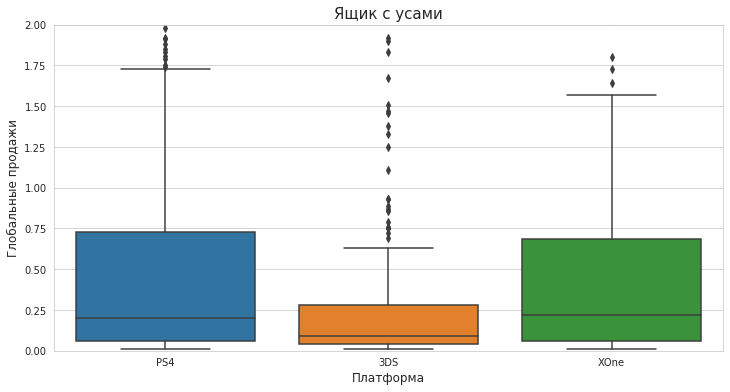

In [38]:
list_of_top3 = ['PS4','XOne','3DS']
plt.figure(figsize=(12,6))
vasya = sns.boxplot(x='platform', y='total_sales', 
                    data=current_period.query('platform.isin(@list_of_top3)'))
vasya.set(ylim=(0,2))
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Вывод: Провели срез данных для того, чтоыб отрисовать ящики с усами.
- Исходя из графиков видно, что медиана протекает у PS4 и XOne на одном уровне, у 3DS она меньше
- Больше всех продаж у PS4, затем XOne, 3DS на последнем месте.

### Влияние на продажи внутри одной популярной платформы.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Будем считать по PS4

Посчитаем зависимость колличества продаж от оценки пользователей

-0.03


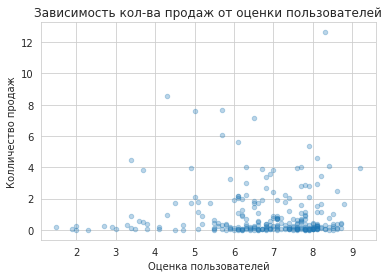

In [39]:
sony_play_station4 = current_period.query('user_score != -1 & platform == "PS4"') # убираем заглушку (-1)
print(sony_play_station4['user_score'].corr(sony_play_station4['total_sales']).round(2))
sony_play_station4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.3) # Построим график
plt.title('Зависимость кол-ва продаж от оценки пользователей', size=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Колличество продаж')
plt.show()

Посчитаем зависимость колличества продаж от оценки критиков

0.41


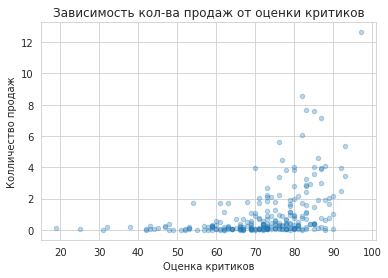

In [40]:
sony_play_station4 = current_period.query('critic_score != -1 & platform == "PS4"') # Делаем срез и убираем заглушку (-1)
print(sony_play_station4['critic_score'].corr(sony_play_station4['total_sales']).round(2))
sony_play_station4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.3) # Построим график
plt.title('Зависимость кол-ва продаж от оценки критиков', size=12)
plt.xlabel('Оценка критиков')
plt.ylabel('Колличество продаж')
plt.show()

Судя по данным очевидно, что оценка пользователей меньше вливаяет на продажи платформы PS4, чем оценка критиков.

### Влияние на  продажами игр на других популярных платформах.

In [41]:
playstation4 = current_period.query('user_score != -1 & platform == "PS4" & critic_score != -1') # Так же убираем заглушку с оценок пользователей и критиков
xbox_one = current_period.query('user_score != -1 & platform == "XOne" & critic_score != -1')
nintendo = current_period.query('user_score != -1 & platform == "3DS" & critic_score != -1')

Посчитаем корреляцию Пирсона пользователей для `XboxOne` и `Nintendo`, а так же построим график зависимостей для ТОП3 популярных консолей.

Коррелиция Xbox пользователи: -0.09
Коррелиция Nintendo пользователи: 0.27


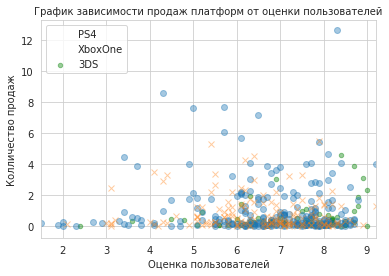

In [42]:
print('Коррелиция Xbox пользователи:', xbox_one['user_score'].corr(xbox_one['total_sales']).round(2)) # подсчет корреляции
print('Коррелиция Nintendo пользователи:',nintendo['user_score'].corr(nintendo['total_sales']).round(2))# подсчет корреляции
ax = playstation4.plot(x = 'user_score', y='total_sales', style='o', label='PS4', alpha=0.4) # график зависимостей
xbox_one.plot(x = 'user_score', y='total_sales', style='x', ax=ax, label='XboxOne', alpha=0.4)
nintendo.plot(kind = 'scatter', x = 'user_score', y='total_sales', color = 'green', ax=ax,  label='3DS', alpha=0.4)
plt.title('График зависимости продаж платформ от оценки пользователей', size=10);
plt.xlabel('Оценка пользователей')
plt.ylabel('Колличество продаж')
plt.show()

Посчитаем корреляцию Пирсона критиков для `XboxOne` и `Nintendo`, а так же построим график зависимостей.

Коррелиция Xbox критики: 0.41
Коррелиция Nintendo критики: 0.34


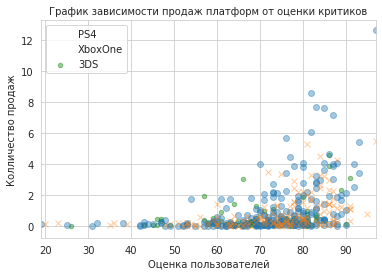

In [43]:
print('Коррелиция Xbox критики:', xbox_one['critic_score'].corr(xbox_one['total_sales']).round(2)) # подсчет корреляции
print('Коррелиция Nintendo критики:',nintendo['critic_score'].corr(nintendo['total_sales']).round(2)) # подсчет корреляции
ax = playstation4.plot(x = 'critic_score', y='total_sales', style='o', label='PS4', alpha=0.4) # график зависимостей
xbox_one.plot(x = 'critic_score', y='total_sales', style='x', ax=ax, label='XboxOne', alpha=0.4)
nintendo.plot(kind = 'scatter', x = 'critic_score', y='total_sales', color = 'green', ax=ax,  label='3DS', alpha=0.4)
plt.title('График зависимости продаж платформ от оценки критиков', size=10);
plt.xlabel('Оценка пользователей')
plt.ylabel('Колличество продаж')
plt.show()

- Практически у всех трех платформ присутствует отрицательная корреляция, между оценками пользователей и продажами, и положительная между оценкой критиков к продажам.
- Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

### Распределение игр по жанрам

**Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?.**

С помощью сводной таблицы выведем жанры и их продажи.

In [44]:
game_genre = current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
game_genre = game_genre.reset_index().rename_axis(None, axis=1)
game_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Построим график распределения игр по жанрам

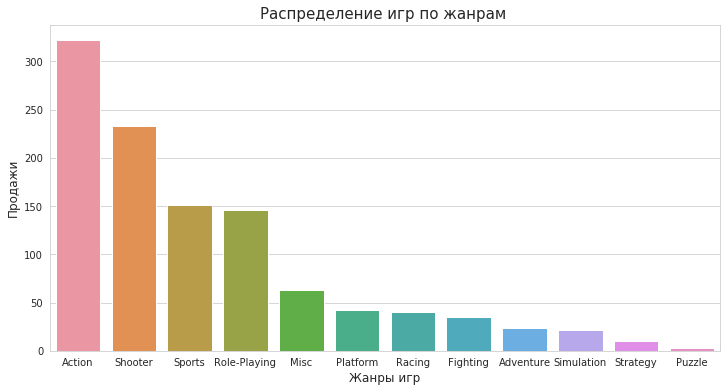

In [45]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=game_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Наблюдаем, что жанры `Action` и `Shooter` геймеры выбирают чаще все, а вот стратегии и пазлы наименее популярны.

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов

Найдём жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи:

           genre  total_sales
0        Shooter        0.450
1         Sports        0.240
2       Platform        0.225
3   Role-Playing        0.125
4       Fighting        0.125
5         Racing        0.120
6         Action        0.110
7     Simulation        0.100
8           Misc        0.100
9       Strategy        0.080
10        Puzzle        0.060
11     Adventure        0.030


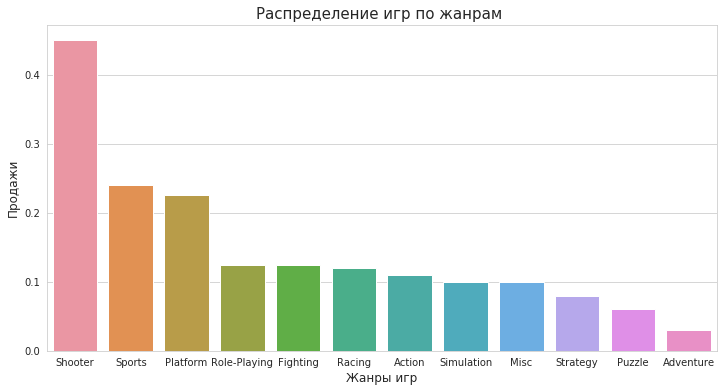

In [46]:
profitable_genre = current_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
profitable_genre = profitable_genre.reset_index().rename_axis(None, axis=1)
print(profitable_genre)

plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=profitable_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

**Вывод**

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2010 года. С 2010 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет примерно 10 лет. Пик продаж наступает примерно через 3 - 5 лет после выхода приставки.


Далее взяв данные за соответствующий актуальный период(выбрали сами) 2013-2017 г. выявили 3 потенциально выгодных платформы: `PS4`, `XboxOne`, `Nintendo DS`.


Выявили, что для покупателей оценки критиков важней, чем оценки оценки пользователей.


Так же определили самый продаваемый игровой жанр - (экшн,шутер) и самые слабые по продажам(стратегии, пазлы)

Путем подсчета медианных значений для жанров, мы выделили топ 3 жанров со стабильно высоим доходом:
1. `Shooter`
2. `Sports`
3. `Platform`

## Портрет пользователя для каждого региона

**Определим для пользователя каждого региона (NA, EU, JP)**

### Самые популярные платформы

Посчитаем колличество продаж с кажого региона:

In [47]:
regions_sales = current_period.pivot_table(index='total_sales', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sum()
regions_sales

eu_sales    392.23
jp_sales    140.78
na_sales    437.71
dtype: float64

In [48]:
new_df = df.query('year_of_release >= 2013')

In [49]:
# составим список континентов
continents = ['na_sales', 'jp_sales', 'eu_sales']

Доли продаж популярных консолей для каждого региона:

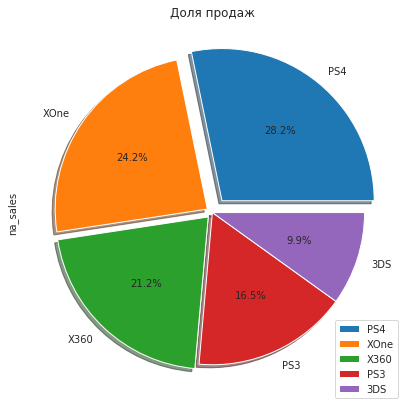

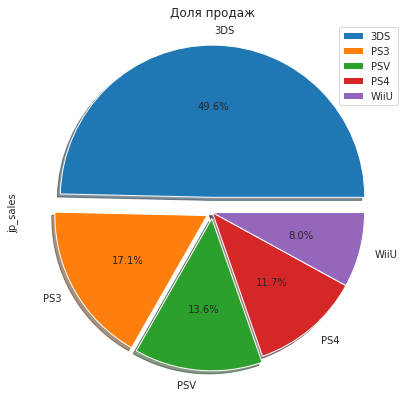

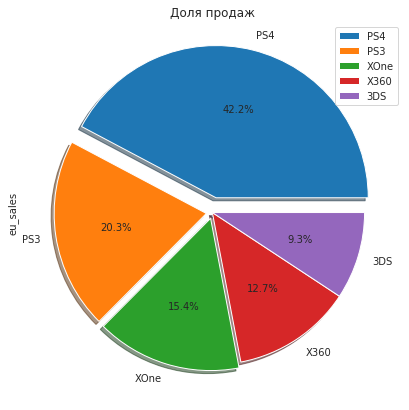

In [50]:
for i in continents:
    (new_df.pivot_table(index='platform', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(5) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0.04, 0, 0), 
                                      figsize=(7,7),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

Вывод: жители разных контенентов, преподчетают разные игровые платформы:

**Северная Америка:**
 
 1. PS4(28.2%)
 2. XboxOne(24.2%)
 3. Xbox360(21.2%)

Суммарно с небольшим разрывом Xbox, скорее всего это связано тем, что данная консоль производится в Америке

**Япония:**
 1. Nintendo 3DS (49.6%)
 2. PS3 (17.1)
 3. Остальные консоли имеют менее 15% рынка

Это обусловлено тем, что  Nintendo и PS разрабатываются и производятся в Японии

**Европа:**
 1. PS4 (42.2%)
 2. PS3(20.3%)

Коорпорация Sony явно лидирует на рынке Европы.

### Самые популярные жанры

Построим круговую диаграмму для Северной Америки

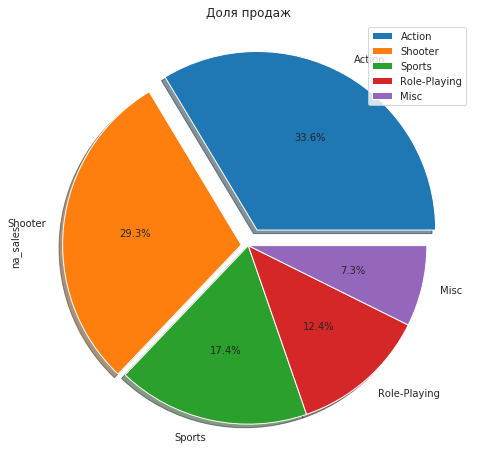

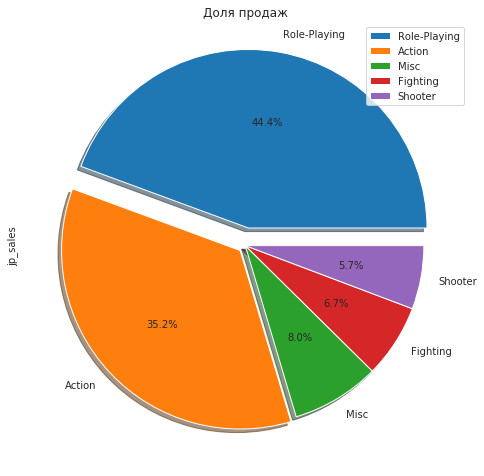

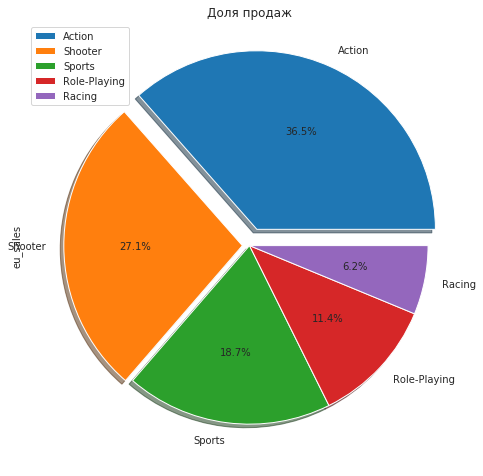

In [51]:
for i in continents:
    (new_df.pivot_table(index='genre', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(5) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0, 0, 0), 
                                      figsize=(8,9),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

Вывод: 

Европейцы и Американцы предпочитают жанры компьютерных игр, в которых делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции, а именно:
 - `Action`
 - `Shooter`
 
Японские геймеры немного отличаются от своих коллег с других контенентов. Они предпочитают такие жанры, как:
 - `Role-Playing`
 - `Action`
 
*Role-Playing*  - игра, в которой игрок действует по роли определённого персонажа. (Действует как определённый персонаж из комиксов, игр, мультиков, фильмов и т.д.)

### Влияние рейтинга ESRB на продажи

Проверим уникальные значения в рейтинге `ESRB` и разберемся в нем:

In [52]:
df['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

`«EC»`(«Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.

`«E»` («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.

`«E10+`(«Everyone 10 and older») — «Для всех от 10 лет и старше»

`«T»` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

`«M»` («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

`«AO»` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

`«RP»` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

Уберем отсуствующие значения в столбце `rating`

In [53]:
new_rating = new_df.query('rating != "nan"')

In [54]:
new_rating['rating'].unique()

array(['M', 'Unknown', 'E', 'T', 'E10+'], dtype=object)

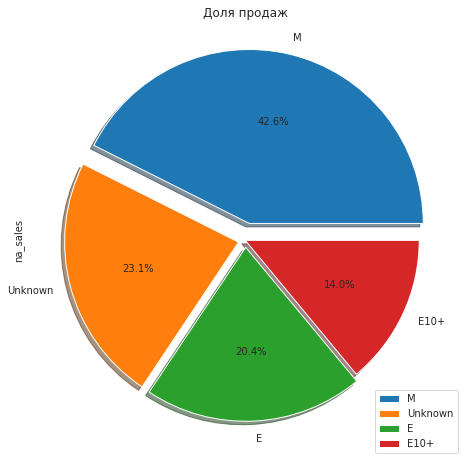

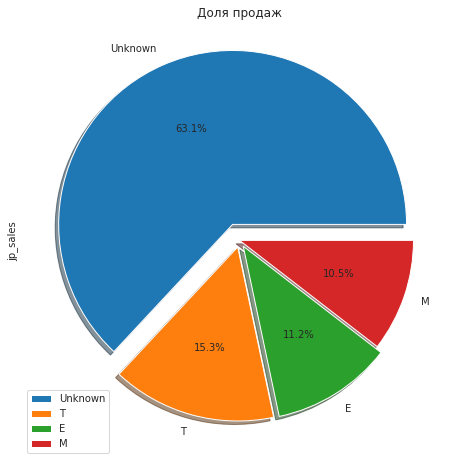

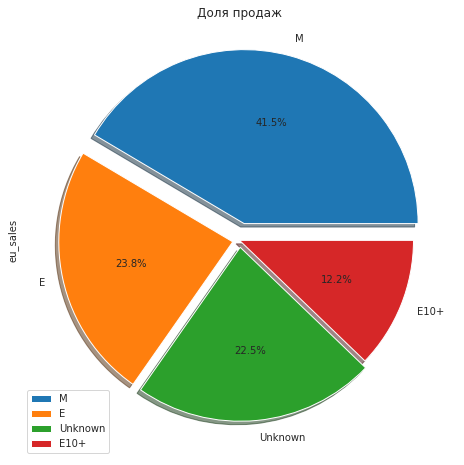

In [55]:
for i in continents:
    (new_rating.pivot_table(index='rating', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(4) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0.04, 0), 
                                      figsize=(8,8),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

###### **Вывод:**


Вывод:

Самые популярные игровые платформы в Cеверной Америке это:

- X360
- PS4
- PS3
- XOne
- 3DS

Топ 5 жанров в Северной Америке:

- Action
- Shooter
- Sports
- Role-Playing
- Misc

По рейтингам видно, что больше всего продаж у игр с рейтингом M "Для взрослых", на втором месте игры с рейтингом E "Для всех" и на третьем месте игры с рейтингом E10+"Для всех от 10 лет и старше"

Самые популярные игровые платформы в Европе это:

- X360
- PS4
- PS3
- XOne
- 3DS

Топ 5 жанров в Европе:

- Action
- Shooter
- Sports
- Role-Playing
- Racing

По рейтингам видно, что европейцы предпочитают то же, что и американцы.

Самые популярные игровые платформы в Японии это:

- 3DS
- PS3
- PSV
- PS4
- WiiU

Топ 5 жанров в Японии:

- Role-Playing
- Action
- Misc
- Figting
- Shooter


По рейтингам видно, что больше всего продаж у игр с рейтингом "Подросткам", на втором месте игры с рейтингом "Для всех" и на третьем месте игры с рейтингом "от 17 и выше"

Технологии меняются с очень быстрыми темпами, и вкусы людей также могут и будут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра `action` и `shooter` , для платформы `PS4` и с рейтингом от 17 и выше.

В рейтинге ESRB по Японии наблюдаем более 60% `Unknown`. Если бы не заполнили пропуски заглушкой в данном случае, то потреляли 60% наблюдений т.к. пропуски не попали бы в группировку.

Проанализировав, считаю, что природой этих пропусков является - (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт. (от А (все возраста) до Z (18+) Например Z - контролируется государством. Из-за разных метрик - появились эти пропуски.

Требуется более точная выгрузка данных, т.к. такие же значения `unknown` наблюдаются и на других континентах. После этого объеденить в единый стандант разные "буквы" рейтинга. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Первым делом нужно сравнить дисперсии рейтингов платформ:

In [56]:
hipotes_xbox = new_df.query('platform == "XOne" & user_score != -1') # срез по платформе "XboxOne", так же удаляем заглушку
hipotes_pc = new_df.query('platform == "PC" & user_score != -1') # срез по платформе "РС", так же удаляем заглушку

In [57]:
x = hipotes_xbox['user_score']
variance_hipotes_xbox = np.var(x) #ddof не учитываем, т.к. в задании не указано, что это выборка
print('Дисперсия для Xbox:', variance_hipotes_xbox)

Дисперсия для Xbox: 1.8965188383045526


In [58]:
x = hipotes_pc['user_score']
variance_hipotes_pc = np.var(x) #ddof не учитываем, т.к. в задании не указано, что это выборка
print('Дисперсия для PC:', variance_hipotes_pc)

Дисперсия для PC: 3.016306347554631


Cоставим нулевую и альтернативную гипотезы. 

H₀(нулевая гипотеза) всегда формулируется так, что изпользовать знак равенства(=).

 - H₀ - средние рейтинги платформ «Xbox One » и «PC» одинаковые
 - H₁ - средние рейтинги платформ «Xbox One » и «PC» не одинаковые

`equal_var` - необязательный параметр, задающий считать ли равными дисперсии генеральных совокупностей, из которых были сформированы выборки.

Т.к. дисперсии разные, значит параметр `equal_var = False` (не считать)

In [59]:
sample1 = hipotes_xbox['user_score']
sample2 = hipotes_pc['user_score']
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)
print('p_значение', (results.pvalue).round(2))
if results.pvalue < alpha:
    print('Отвергаем H₀')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_значение 0.15
Не получилось отвергнуть нулевую гипотезу


Принимаем гипотезу о равенстве рейтингов платформ

### Средние пользовательские рейтинги жанров Action и Sports разные

Cравним дисперсии рейтингов жанров:

In [60]:
user_rating_action = new_df.query('genre == "Action" & user_score != -1')# срез по жанру "Action", так же удаляем заглушку
user_rating_sports = new_df.query('genre == "Sports" & user_score != -1')# срез по жанру "Sports", так же удаляем загрушку

In [61]:
x = user_rating_action['user_score']
variance_rating_action = np.var(x) #ddof не учитываем, т.к. в задании не указано, что это выборка
print('Дисперсия для жанра "Action":', variance_rating_action)

Дисперсия для жанра "Action": 1.7648124186332366


In [62]:
x = user_rating_sports['user_score']
variance_rating_sports = np.var(x) #ddof не учитываем, т.к. в задании не указано, что это выборка
print('Дисперсия для жанра "Sports":', variance_rating_sports)

Дисперсия для жанра "Sports": 3.160733984375


Составим нулевую и альтернативную гепотезы:

 - H₀ - средние рейтинги жанров «Action» и «Sports» одинаковые
 - H₁ - средние рейтинги жанров «Action» и «Sports» не одинаковые

Дисперсии разные, значит параметр equal_var = False (не считать)

In [63]:
sample1 = user_rating_action['user_score']
sample2 = user_rating_sports['user_score']
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)
print('p_значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем H₀')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_значение 1.4460039700704315e-20
Отвергаем H₀


Отвергаем нулевую гипотезу о том, что пользовательские рейтинги этих жанров одинаковые.

Вывод: Попадание или непопадание значения, посчитанного по выборке, в критический интервал - не повод считать, что наши гипотезы доказаны или нет. Иными словами, мы не принимаем H₀(нулевую гипотезу). Данные лишь могут дать нам основания отвергнуть(или нет) H₀.

Для проверки гипотез, был выбран метод `scipy.stats.ttest_ind(array1,array2)`. Т.к. у нас есть основание полагать, что выборки взяты из схожих по параметрам совокупностей. А так же, нам нужен этот метод, для того, чтобы получить более точные результаты.

## Общий вывод

**При работе с дасетом были выполнены следующие действия:**


- Изучили исходные данные
- Провели предобработку данных (заменили пропуска, исправили типы данных на необходимые)
- Сделали подсчет суммарный продаж копий по каждой игре
- Проверили исследовательский анализ данных, а именно:
 - Проанализировали колличество выпускаемых игр за каждый год
 - Проанализировали продажи каждый платформ, и определили среднюю продолжительность "жизни" каждой из них
 - Выбрали актуальный период, для дальнейшего анализа
 - Выбрали ТОП-3 популярнейших консолей исходя из актуального периода
 - Определили, как вляют на продажи оценки пользователей и критиков
 - Выявили самые прибыльные жанры
- Составили портрет пользователя для каждого региона
 - Проанализировав, выбрали ТОП-5 популярнейших платформ для пользователя
 - Проанализировав, выбрали ТОП-5 популярнейших жанров для пользователя
 - Определили влияние рейтинга ESRB на продажи
- Проверили гепотезы


**Подведем итог**

Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью со второй половины 90х до 2010 года. С 2010 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.


- За весь период консольных приставок самые популярные оказались: `PS4`, `XboxOne`, `3DS`, `PS3`, `DXbox360`.


- Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 3-5 лет после выпуска консоли.
    
    
- Исходя из анализа мы увидели, что у `Nintendo WII` был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус.


- Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
    
    
- Так же определили, что самый популярный жанр за все время это `Action`. На последнем месте стратегии и пазлы.


- В Северной америке самые популярные игровые платформы: `PS4`, `XboxOne`, `Xbox360`. По рейтингам видно, что больше всего предпочтений, у игр с рейтингом M "Для взрослых", на втором месте игры с рейтингом E "Для всех" и на третьем месте игры с рейтингом E10+"Для всех от 10 лет и старше".


- В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: `PS4`, `PS3`, `XOne`, `X360`, `3DS`. Рейтинг игр не отличается.


- В Японии люди предпочитают игровые приставки: `3DS`, `PS3`, `PS4`. А жанры игры : Role-playing, action и misc. Полный вывод о рейтинге мы не может дать, т.к. из исходного DataFrame нам дано менее 40% данных по рейтингам. Если исходить из неполных данных, то проанализировов, выяснили, что больше всего продаж у игр с рейтингом "Подросткам", на втором месте игры с рейтингом "Для всех" и на третьем месте игры с рейтингом "от 17 и выше".

Исходя из вышеперечисленного делаю вовод, что правильнее будет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании по разному, в зависимости от региона:
- Для Америки - сконцентрироваться на игры для приставок серии `Xbox` и `PS` с жанром `Action` и `Shooter` в одинаковой пропорции и рейтингом `17+` 
- Для Европы - сконцентрироваться на игры для приставок серии `Xbox` и `PS` с жанром `Action` и `Shooter` в одинаковой пропорции и рейтингом ``13+`
- Для Японии, обратить внимание рекламных представителей на консоли `Nintendo` и `PS` с жанрами `Role-playing` и `Action`, с большей выкладкой на `PS - Role-playing` и рейтингами `6+` и `13+`.

Требуется более полные данные по рейтингам, которые после обработки мы объеденим в единые категории.